# Lab 1

# Business Understanding

### Describe the purpose of the data set you selected 
- *Why was this data collected in the first place?* - The data set selected is the "UNSW_NB15" network traffic data set. The data set was created to evalutate Network Intrusion Detection Systems (NIDS). According to the creators of the data set, N. Moustafa and J. Slay from the Australian Defence Force Academy, the "quality of a NIDS data set reflects two important characteristics: comprehensive reflection of contemporary threats and an inclusive normal range of traffic [1]." Before this data set was generated, they argued that existing data sets used to train and test NIDS were not representative of current traffic flows and threats.
- Describe how you would define and measure the outcomes from the dataset. That is: 
    - *Why is this data important?* - The importance of this data set is that it will allow NIDS to be evaluted better, which will increase their performance, increase their protective power and reduce the chance of false positives and false negatives.
    - *How do you know if you have mined useful knowledge from the dataset?* - We will know we mined useful knowledge from the data set if we can determine, based on a collection of packets of traffic data, whether the features of those packets indicate an attack or just normal traffic.
    - *How would you measure the effectiveness of a good prediction algorithm? Be specific.* Finding a model that predicts from the network traffic whether an attack is occuring or not, and, if there is an attack, which category of attack if occuring, will measure the effectiveness of the model. Determining if an attack is occuring is the basis of the model and with refinement, we will try to search for categorizing the attack.

# Data Understanding

In [3]:
# Imports
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys

warnings.simplefilter('ignore', DeprecationWarning)
pd.set_option('display.max_columns', None)    # set the max columns to show to unlimited

%matplotlib inline

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 2.7.12 |Anaconda 2.3.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]
Pandas version 0.17.1


In [5]:
# Load UNSW_NB15 into a Pandas dataframe
# ref: http://stackoverflow.com/questions/18664712/split-function-add-xef-xbb-xbf-n-to-my-list (2 get rid of UTF-8 BOM)
df = pd.read_csv('UNSW_NB15_training_set.csv', encoding='utf-8-sig')  # specifing encoding to get rid of the UTF- Byte order Mark (BOM) in the id field

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

## UNSW_NB15_training_set
- A Network Intrusion Data Set.
    - 82332 rows x 45 columns
        - **id** *int* The id of the record
        - **dur** *float* Record's total duration
        - **proto** *Nominal* Tranaction Protocol
        - **service** *Nominal* http, ftp, ssh, dns, ..., else(-)
        - **state** *Nominal* The state and its dependent protocol e.g. ACC, CLO, FIN, INT, ..., else (-)
		- **spkts** *int* Source to destination packet count
		- **dpkts** *int* Destination to source packet count 
		- **sbytes** *int* Source to destination bytes
		- **dbytes** *int* Destination to source bytes
		- **rate** *float* 
		- **sttl** *int* Source to destination bytes
		- **dttl** *int* Destination to source time to live
		- **sload** *float* Source bits per second
		- **dload** *float* Destination bits per second
		- **sloss** *int* Source packets retransmitted or dropped
		- **dloss** *int* Destination packets retransmitted or dropped
		- **sinpkt** *float* Source inter-packet arrival time(mSec)
		- **dinpkt** *float* Destination inetr-packet arrival time(mSec)
		- **sjit** *float* Source jitter (mSec)
		- **djit** *float* Destination jitter(mSec)
		- **swin** *int* Source TCP window advertisment
		- **stcpb** *int* Source TCP sequence number
		- **dtcpb** *int* Destination TCP sequence number
		- **dwin** *int* Destination TCP window advertisment
		- **tcprtt** *float* The sum of 'synack' and 'ackdat' of the TCP
		- **synack** *float* The time between the SYN and the SYN_ACK packets of the TCP
		- **ackdat** *float* The time between the SYN_ACK and the ACK packets of the TCP
		- **smean** *int* Mean of the flow packet size transmitted by the sre
		- **dmean** *int* Mean of the flow packet size transmitted by the dst
		- **trans_depth** *int* The depth into the connection of the http request/response transaction
		- **response_body_len** *int* The content size of the data transferred from the server's http service
		- **ct_srv_src** *int* No. of Connection that contain the same service (14) and source address in 100 connections according to the last time
		- **ct_state_ttl** *int* No. for each state (6) according to specific range if value for source/destination time to live
		- **ct_dst_ltm** *int* No of connectiuon of the same destination address (3) in 100 connections according to the last time
		- **ct_src_dport_ltm** *int* No. of connection of the same source address and the destination port in 100 connections according to the last time
		- **ct_dst_sport_ltm** *int* No. of connnection of the same destination address(3) and the source port (2) in 100 connection according to the last time (26).
		- **ct_dst_src_ltm** *int* No connection of the same cource (1) and the destination (3) address in 100 connection according to the last time (26)
		- **is_ftp_login** *int* (binary) If the ftp session is accessed by user and password then 1 else 0
		- **ct_ftp_cmd** *int* No. of flows that has a command in ftp session
		- **ct_flw_http_mthd** *int* No. of flows that has methof such as Get and Post in http service
		- **ct_src_ltm** *int* No of connections of the same source address (1) in 100 connection according to the last time(26).
		- **ct_srv_dst** *int* No. of connectio that conbtain the same service and destination address in 100 connection according to the last time
		- **is_sm_ips_ports** *int* (binary) If source equals to destination (3) IP addresses and port numbers (2)(4) are equal, this variable takes value 1 else 0
		- **attack_cat** *Nominal* The name of each attack category. In this data set, nine categories (e.g. Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms) (Labeled Feature)
		- **label** *int* (Binary) 0 for normal and 1 for attack records (Labeled feature)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

### Verify data quality: Explain any missing values, duplicate data, and outliers.
    - Are those mistakes? How do you deal with these problems? Be specific.

In [7]:
# df.describe() calculates summary statistics the count, mean, standard deviation, min, max, and quartiles 
# of the data less the nominal (object) columns. 
df_desc_table = df.describe() # result: 41 numeric types
df_desc_table

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7993.908165,13233.785563,82410.886739,180.967667,95.713003,6.454902e+07,630546.959000,4.753692,6.308556,755.394301,121.701284,6363.075100,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1595.371885,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,171642.261880,151471.456091,148620.367041,101.513358,116.667722,1.798618e+08,2393000.555646,64.649620,55.708021,6182.615732,1292.378499,56724.016689,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,38066.972292,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2112.951416,1.000000,0.000000,0.557928,0.010000,17.623919,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,15858.082275,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,253.000000,5.268000e+09,20821108.000000,5319.000000,5507.000000,60009.992000,57739.240000,1483830.917000,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5242880.000000,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


Summary statistics above are for numeric data types with a totoal of 41 features.  the count of 82332 indicate no missing data.  

Binary Data types are **is_sm_ips_ports**, **is_ftp_login**, **label**
- **label** Min = 0, Max = 1, which is what I would expect as it is binary in nature where 0 means it is a normal packet, while 1 means it is an attack record (or abnormal)
- **is_sm_ips_ports**  Min = 0, Max = 1, which is what I would expect as it is binary in nature
- ** is_ftp_login **  Min = -=0, Max = 2, I wouldn't expect max = 2 for this feature  (Marked 


In [8]:
df.describe(include=['O']) # summary statistics on the categrical data types in our dataset.

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


dur float64
spkts int64
dpkts int64
sbytes int64
dbytes int64
rate float64
sttl int64
dttl int64
sload float64
dload float64
sloss int64
dloss int64
sinpkt float64
dinpkt float64
sjit float64
djit float64
swin int64
stcpb int64
dtcpb int64
dwin int64
tcprtt float64
synack float64
ackdat float64
smean int64
dmean int64
trans_depth int64
response_body_len int64
ct_srv_src int64
ct_state_ttl int64
ct_dst_ltm int64
ct_src_dport_ltm int64
ct_dst_sport_ltm int64
ct_dst_src_ltm int64
is_ftp_login int64
ct_ftp_cmd int64
ct_flw_http_mthd int64
ct_src_ltm int64
ct_srv_dst int64
is_sm_ips_ports int64
label int64
0
82332
6201


C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


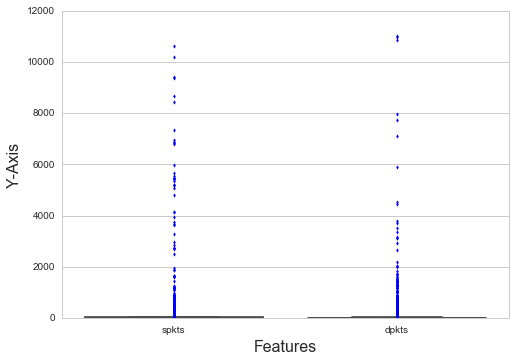

In [9]:
# this could be useful http://stackoverflow.com/questions/24901766/python-how-to-get-column-names-from-pandas-dataframe-but-only-for-continuous
df2 = df.copy(deep=True)
df2.drop('id', axis=1, inplace=True) # 1 is the axis number ( 0 for rows 1 for columns), dropping id as it doesn't make sense to plot outliers for that column
for col in df2.columns:
    if(df2[col].dtype == np.float64 or df2[col].dtype == np.int64):
        # do something
        print df2[col].name + " " + str(df[col].dtype)


# using += 1.5 IQR to determine outliers from continous/oridnal numbers. 
col_rate = df_desc_table['rate']
df_sub2 =df[['rate']]
#type(df_desc_table)
#type(col_rate) # pandas.core.series.Series
#col_rate
#df_desc_table.keys()
q1 = df_desc_table.iloc[4]['rate']  # 6 = 25% row of description table or Q1
q3 = df_desc_table.iloc[6]['rate']  # 6 = 75% row of description table or Q3
iqr = q3 - q1
upper_outlier_threshold = q3 + (1.5 * iqr) 
lower_outlier_threshold = q1 - (1.5 * iqr)
#df_desc_table.get_values()
#ol_rate[np.abs(col_rate) > 2]
# http://stackoverflow.com/questions/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas
#df_info = df.info()
#type(df_info) # NoneType
# type(df.columns) # pandas.core.index.Index
col_index = df.columns
col_index.get_values() # Returns an array of column names 
col = df['rate']
lower_outliers = col[col < lower_outlier_threshold]
upper_outliers = col[col > upper_outlier_threshold]
print len(lower_outliers)
print len(col)
print len(upper_outliers)
# according to this link , outliers do not show when you use seaborn: http://stackoverflow.com/questions/28908003/matplotlib-box-plot-fliers-not-showing
# sns.boxplot (data_to_plot, ax=ax)
#df.boxplot(column='rate', return_type='axes')  # 
#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['spkts', 'dpkts']] , fliersize=3) # api: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html
#df_info.iloc[0][4]

In [10]:
#******* 
# Code that calculates the number of outliers below and above for continous numeric features.
# this is to help determine which particular feature to do box plots on.
#ref: http://stackoverflow.com/questions/24901766/python-how-to-get-column-names-from-pandas-dataframe-but-only-for-continuous
df_cont = df.select_dtypes(['float64', 'int64']) # a data frame of just continous variables
len(df_cont.columns)
df_cont.drop('id', axis=1, inplace=True) # 1 is the axis number ( 0 for rows 1 for columns), dropping id as it doesn't make sense to plot outliers for that column
len(df_cont.columns)
print "column name:#lower_outliers:#obserations:#upper_outliers:Max Values"
num_features_with_outliers = 0
for col_name in df_cont.columns:
    q1 = df_desc_table.iloc[4][col_name]  # 4 = 25% row of description table or Q1
    q3 = df_desc_table.iloc[6][col_name]  # 6 = 75% row of description table or Q3
    max_val = df_desc_table.iloc[7][col_name] # 7 = max value
    iqr = q3 - q1
    upper_outlier_threshold = q3 + (1.5 * iqr) 
    lower_outlier_threshold = q1 - (1.5 * iqr)
    col = df[col_name]
    lower_outliers = col[col < lower_outlier_threshold]
    upper_outliers = col[col > upper_outlier_threshold]
    if (len(lower_outliers) + len(upper_outliers)) > 0:
        num_features_with_outliers+=1
        print col_name + ":" + str(len(lower_outliers)) + ":" + str(len(col)) + ":" + str(len(upper_outliers)) + ":" + str(max_val)
print "number of features with outliers: " + str(num_features_with_outliers)

#df.describe()

column name:#lower_outliers:#obserations:#upper_outliers:Max Values
dur:0:82332:5868:59.999989
spkts:0:82332:10196:10646.0
dpkts:0:82332:8907:11018.0
sbytes:0:82332:9270:14355774.0
dbytes:0:82332:12308:14657531.0
rate:0:82332:6201:1000000.003
sload:0:82332:6715:5268000256.0
dload:0:82332:18112:20821108.0
sloss:0:82332:5499:5319.0
dloss:0:82332:11272:5507.0
sinpkt:0:82332:5668:60009.992
dinpkt:0:82332:4717:57739.24
sjit:0:82332:6321:1483830.917
djit:0:82332:8573:463199.2401
tcprtt:0:82332:2020:3.821465
synack:0:82332:2954:3.226788
ackdat:0:82332:2480:2.928778
smean:0:82332:11928:1504.0
dmean:0:82332:9902:1500.0
trans_depth:0:82332:7582:131.0
response_body_len:0:82332:5657:5242880.0
ct_srv_src:0:82332:10093:63.0
ct_state_ttl:0:82332:1833:6.0
ct_dst_ltm:0:82332:10479:59.0
ct_src_dport_ltm:0:82332:11476:59.0
ct_dst_sport_ltm:0:82332:10907:38.0
ct_dst_src_ltm:0:82332:12789:63.0
is_ftp_login:0:82332:678:2.0
ct_ftp_cmd:0:82332:680:2.0
ct_flw_http_mthd:0:82332:7580:16.0
ct_src_ltm:0:82332:9579

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Based on the code above there are 33 features with outliers based on 1.5IQR standard.
Note: Results were pulled out into excel to sort on number of outliers and max value to try and triage which variables to look
Interesting to note: there were no lower outliers, just upper outliers.
The top 5 features based on large number of outliers are: 
feature name (number of outliers)
dload (18112)
ct_dst_src_ltm (12789)
dbytes(12308)
smean(11928)
ct_src_dport_ltm(11476)

Sorting by max_value will help to do box plots for variables with similar magnitude:
E.g. 
'dpkts', 'spkts' are similir in max value
'dloss', 'sloss' are similar in max value
'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' are similar in max vax value

Lets do box plots and histograms on a few ofthese to get a graphical visual and feel of our data



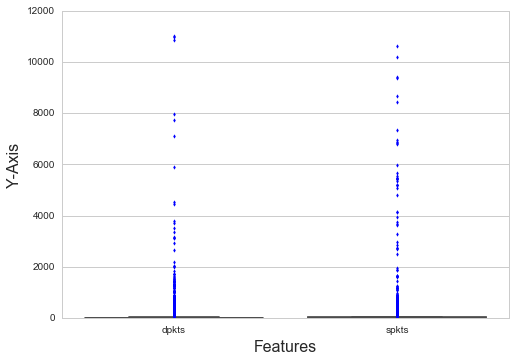

In [11]:
#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dpkts', 'spkts']] , fliersize=3) # api: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DCD93C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002225D940>]], dtype=object)

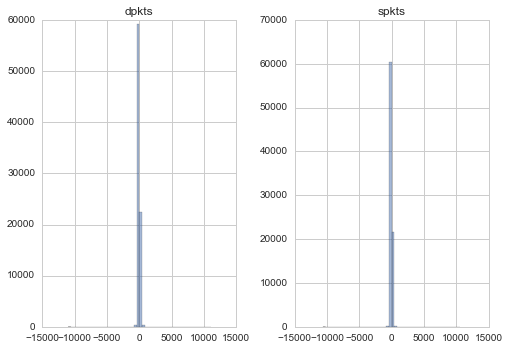

In [12]:
df[['dpkts', 'spkts']].diff().hist(alpha=0.5, bins=50)

Looking at the histogram for dpkts and spkts, there seems to be a lot of values very close to 0 and they seem
to track each other in quantity. I wouldn't be surprised if they were highly correlated.They have very similar steep central distribution centered around 0. With the network setup I wouldn't expect packets to have more than 6 hops based on the network setup.  Based on the summary statistics, 75% the dpkts and spkts have greater than 12, 10 respectively with max values of 10646.000000	11018.000000, respectively. It would be interesting to see if there may be any correlation with these values greater than 75% of the norm correlate to abnormal traffic. 
See Explore relationships for further analysis with these particular features.
(Pearson Correlation heat map shows value of .37 , which indiates some postive correlation of small to medium strength). 
From an outlier perspective, however, it is not clear whether these packets are expected anomolies, or errors in recording.  Will leave them in the dataset for now. 


In [13]:

denom = df[(df['dpkts'] > 10)]
numerator = df[(df['dpkts'] > 10) & (df['label'] == 1)]
print "percent of packets that have dpkts > 10 and abnormal = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['dpkts'] > 10) & (df['label'] == 0)]
print "percent of packets that have dpkts > 10 and normal = " + str((float(len(numerator))/len(denom)) * 100)


percent of packets that have dpkts > 10 and abnormal = 30.4111342185
percent of packets that have dpkts > 10 and normal = 69.5888657815


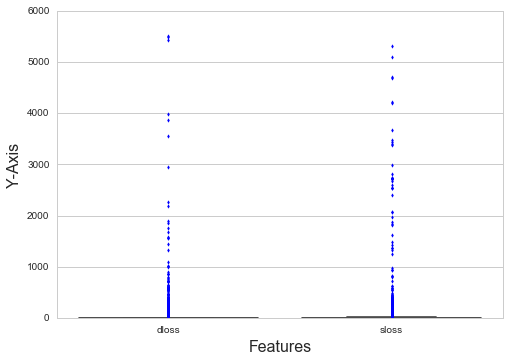

In [14]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dloss', 'sloss']] , fliersize=3) # api: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021A08208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021B76048>]], dtype=object)

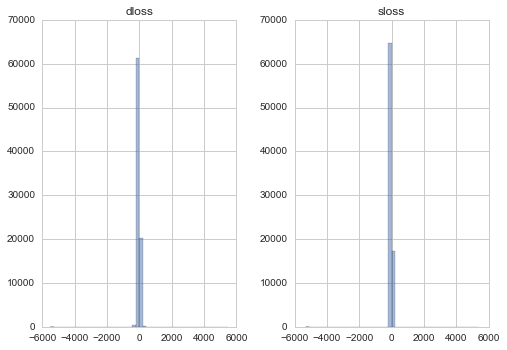

In [15]:
df[['dloss', 'sloss']].diff().hist(alpha=0.5, bins=50)

dloss and sloss also see to have a lot of values near 0 and also seem to have roughly the same amount. Again, would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around 0.

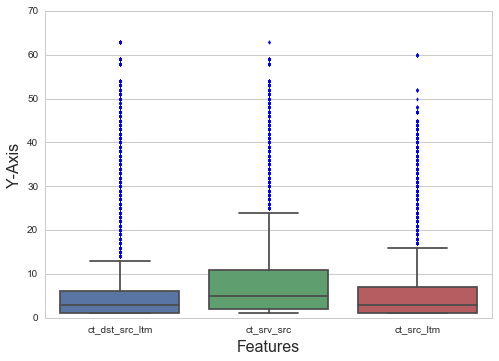

In [16]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']] , fliersize=3) # api: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022789E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022B489E8>]], dtype=object)

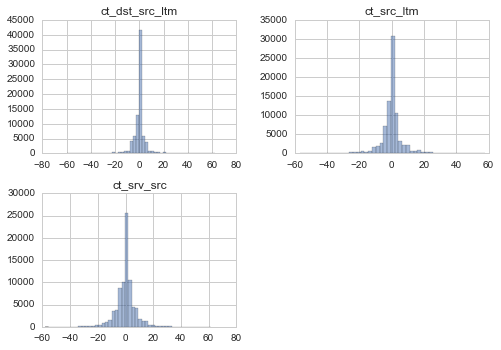

In [17]:
df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']].diff().hist(alpha=0.5, bins=50)

'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' also see to have a lot of values near 0 although slighly wider spread then previous features. Again, would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around 0.

In [18]:
# List the unique values of each column
header = df.columns.values.tolist()
for column in header:
    print column + ":\n", df[column].unique()
    

id:
[    1     2     3 ..., 82330 82331 82332]
dur:
[  1.10000000e-05   8.00000000e-06   5.00000000e-06 ...,   8.11914000e-01
   5.16741000e+00   1.10610100e+00]
proto:
[u'udp' u'arp' u'tcp' u'igmp' u'ospf' u'sctp' u'gre' u'ggp' u'ip' u'ipnip'
 u'st2' u'argus' u'chaos' u'egp' u'emcon' u'nvp' u'pup' u'xnet' u'mux'
 u'dcn' u'hmp' u'prm' u'trunk-1' u'trunk-2' u'xns-idp' u'leaf-1' u'leaf-2'
 u'irtp' u'rdp' u'netblt' u'mfe-nsp' u'merit-inp' u'3pc' u'idpr' u'ddp'
 u'idpr-cmtp' u'tp++' u'ipv6' u'sdrp' u'ipv6-frag' u'ipv6-route' u'idrp'
 u'mhrp' u'i-nlsp' u'rvd' u'mobile' u'narp' u'skip' u'tlsp' u'ipv6-no'
 u'any' u'ipv6-opts' u'cftp' u'sat-expak' u'ippc' u'kryptolan' u'sat-mon'
 u'cpnx' u'wsn' u'pvp' u'br-sat-mon' u'sun-nd' u'wb-mon' u'vmtp' u'ttp'
 u'vines' u'nsfnet-igp' u'dgp' u'eigrp' u'tcf' u'sprite-rpc' u'larp' u'mtp'
 u'ax.25' u'ipip' u'aes-sp3-d' u'micp' u'encap' u'pri-enc' u'gmtp' u'ifmp'
 u'pnni' u'qnx' u'scps' u'cbt' u'bbn-rcc' u'igp' u'bna' u'swipe' u'visa'
 u'ipcv' u'cphb' u'iso-t

#### This section will handle any adjustments to the dataset to handle issues like missing, incorrect values etc

###  Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. 
    - Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful. 

### Visualize the most important attributes appropriately (at least 5 attributes).
    - Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate. 

### Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. 
    - Explain any interesting relationships.

Based on outlier identification of the features spkts and dpkts the following analysis is conducted:

In [19]:

denom = df[(df['dpkts'] > 10)]
numerator = df[(df['dpkts'] > 10) & (df['label'] == 1)]
print "percent of packets that have dpkts > 10 and abnormal = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['dpkts'] > 10) & (df['label'] == 0)]
print "percent of packets that have dpkts > 10 and normal = " + str((float(len(numerator))/len(denom)) * 100)


percent of packets that have dpkts > 10 and abnormal = 30.4111342185
percent of packets that have dpkts > 10 and normal = 69.5888657815


All things being equal,  I would expect a ratio of less than or greater than 50% between normal to abnormal packets to be something interesting that maybe useful in detection.  there is about 40% less destination to source packets for abnormal packets.  

In [20]:
#col_dpkts = df['dpkts', 'label']
denom = df[(df['spkts'] > 10)]
numerator = df[(df['spkts'] > 10) & (df['label'] == 1)]
print "percent of packets that have spkts > 12 and abnormal = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['spkts'] > 10) & (df['label'] == 0)]
print "percent of packets that have spkts > 12 and normal = " + str((float(len(numerator))/len(denom)) * 100)

percent of packets that have spkts > 12 and abnormal = 34.5773825564
percent of packets that have spkts > 12 and normal = 65.4226174436


All things being equal, I would expect a ratio of less than or greater than 50% between normal to abnormal packets to be something interesting that maybe useful in detection, there is about 30% less source to destination to source packets for abnormal packets. Flagged for further analysis. 

label_cat              abnormal  normal
dpkts_cat                              
expected_dpkts_size       39629   23950
unexpected_dpkts_size      5703   13050


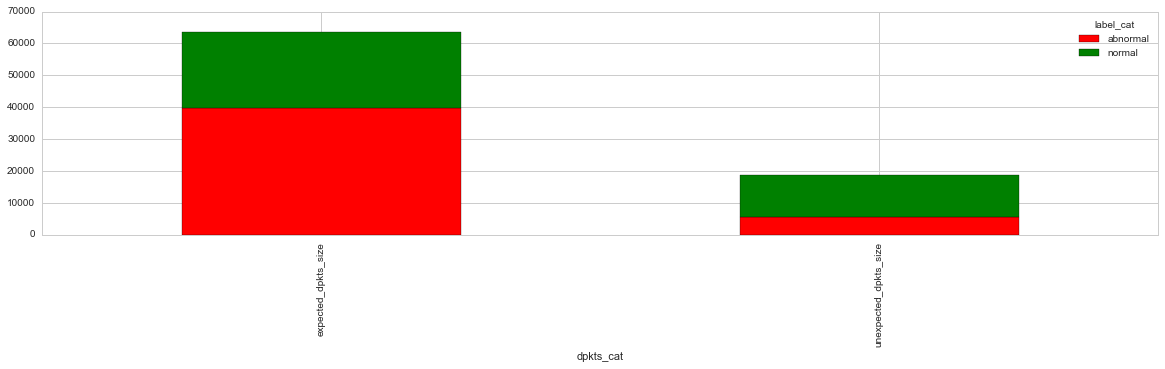

In [21]:
#defensive copy on original dataframe.
df2 = df.copy(deep=True)
bins =[-1, 10, 11019] # Note: values needed to be slighlty greater than the min and max values to ensure the get counted.
bins2 = [-1, .5, 2]  # created bins 2 to rename 0, 1 ( false, true) to normal, abnormal to intepret plot easier.
group_names = ['expected_dpkts_size', 'unexpected_dpkts_size']
group_names2 = ['normal', 'abnormal']
categories = pd.cut(df2['dpkts'], bins, labels=group_names)
categories2 = pd.cut(df2['label'], bins2, labels=group_names2)
df2['dpkts_cat'] =  pd.cut(df2['dpkts'], bins, labels=group_names)
df2['label_cat'] =  pd.cut(df2['label'], bins2, labels=group_names2)
#abnormal_counts = pd.crosstab([df2['dpkts_cat']], df2.label.astype(bool))
abnormal_counts = pd.crosstab([df2['dpkts_cat']], df2.label_cat.astype(str))
print abnormal_counts
#abnormal_counts.plot(kind='bar', stacked=True, color=['green','red'], figsize=(20,4))
abnormal_counts.plot(kind='bar', stacked=True, color=['red','green'], figsize=(20,4)) # swap color when switch out label to abnormal/normal

It is interesting to note that for the expected_dpkts_size (which is defined as anything less than the 75% quartile (< 10)
there are more abnormal packets than normal ones. Conversely, for unexpected dpkts size (>=10) the reverse is true. 

### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Note: In the analysis in the "Explore relationships between attributes" section the cross tab of dpkts and label (normal/abnormal) fulfills this requirment as we believe there may be a relationship between dpkts (indpependent) and label( depenent variable [variable trying to predict])

[u'label', u'spkts', u'dpkts', u'dbytes', u'sbytes', u'rate', u'sloss', u'dloss', u'state', u'ct_dst_src_ltm', u'ct_srv_src', u'ct_src_ltm']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022D0D6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002F9AD4A8>]], dtype=object)

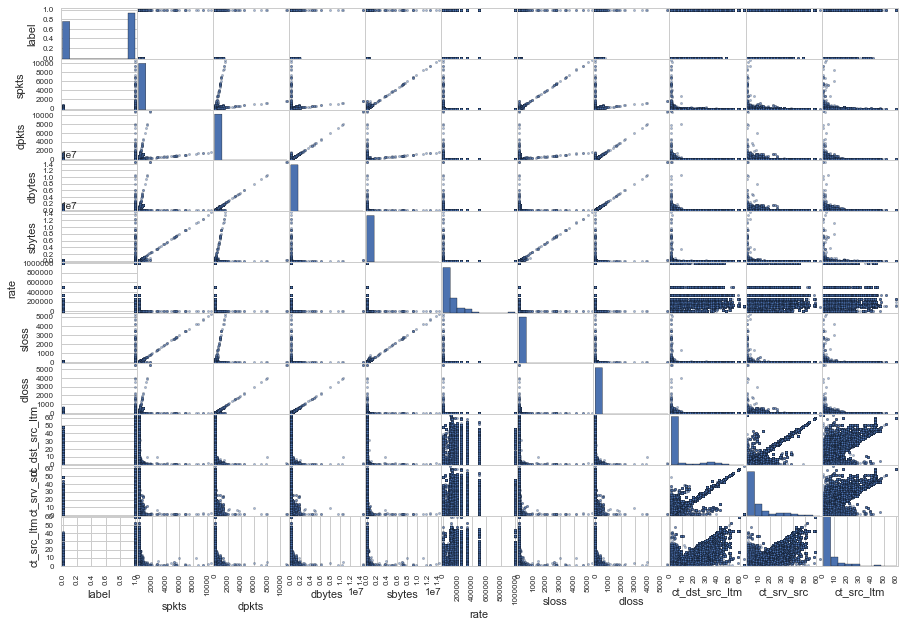

In [22]:
from pandas.tools.plotting import scatter_matrix
df_sub = df[['label', 'spkts', 'dpkts', 'dbytes', 'sbytes', 'rate', 'sloss', 'dloss', 'state', 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' ]]
df_corr = df_sub.corr(method='pearson')

header = df_sub.columns.values.tolist()
print header
len(header)
scatter_matrix(df_sub,figsize=(15, 10))

Looking at the scatter plot matrix, there appears to be varying degrees of  positive linear correlation between the following features:
dbytes - dloss; dpkts - dloss; sbytes  sloss; spkts - sloss; ct_srv_src - ct_dst_src_ltm; dpkts - dbytes
Other features are more difficult to find signifiant linear correlation due to binary nature of variable. 
heatmap below will help identify them visually based on color gradient which relates to strength.

In [23]:
df_corr

,label,spkts,dpkts,dbytes,sbytes,rate,sloss,dloss,ct_dst_src_ltm,ct_srv_src,ct_src_ltm
label,1.000000,-0.027731,-0.061515,-0.032632,0.020641,0.328629,0.006360,-0.044399,0.279989,0.290195,0.276494
spkts,-0.027731,1.000000,0.369554,0.198324,0.965750,-0.068249,0.973644,0.198683,-0.061852,-0.058717,-0.049367
dpkts,-0.061515,0.369554,1.000000,0.976419,0.175834,-0.083173,0.189060,0.981506,-0.075012,-0.062836,-0.057374
dbytes,-0.032632,0.198324,0.976419,1.000000,0.010036,-0.047978,0.014561,0.997109,-0.044048,-0.034330,-0.033301
sbytes,0.020641,0.965750,0.175834,0.010036,1.000000,-0.025102,0.995027,0.007091,-0.024065,-0.030204,-0.021540
rate,0.328629,-0.068249,-0.083173,-0.047978,-0.025102,1.000000,-0.040139,-0.062073,0.358902,0.367670,0.327563
sloss,0.006360,0.973644,0.189060,0.014561,0.995027,-0.040139,1.000000,0.014661,-0.035797,-0.040117,-0.031760
dloss,-0.044399,0.198683,0.981506,0.997109,0.007091,-0.062073,0.014661,1.000000,-0.056492,-0.045932,-0.043066
ct_dst_src_ltm,0.279989,-0.061852,-0.075012,-0.044048,-0.024065,0.358902,-0.035797,-0.056492,1.000000,0.933795,0.840012
ct_srv_src,0.290195,-0.058717,-0.062836,-0.034330,-0.030204,0.367670,-0.040117,-0.045932,0.933795,1.000000,0.822486


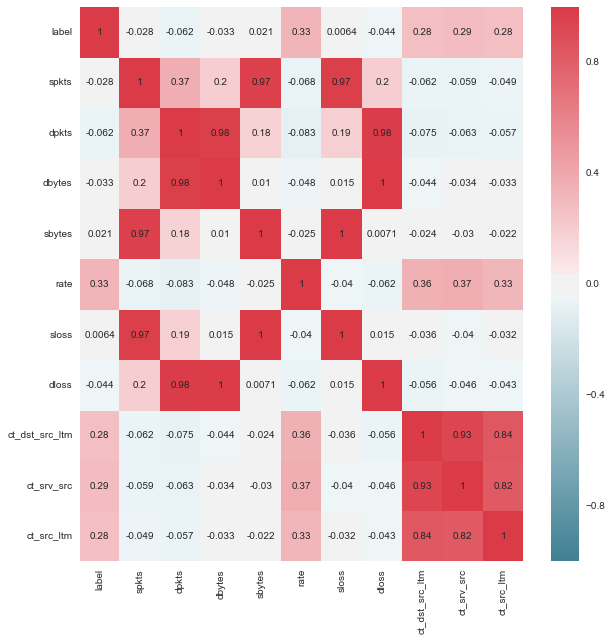

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_corr, cmap=cmap, annot=True)

f.tight_layout()

 ### Are there other features that could be added to the data or created from existing features? Which ones? 

Note: In the analysis in the "Explore relationships between attributes" section the cross tab of dpkts and label (normal/abnormal) fulfills this requirment as we created 'dpkts_cat' and 'label_cat' from the existing variables in continous to categorial conversation to be able to do cross tab analysis.


In [33]:
#ref: http://localhost:8888/notebooks/DataMiningNotebooks/03.%20Dimension%20Reduction.ipynb

# Lets apply PCA against our numeric variables to see if we can find new component features that my reduce
# the dimensionality of our dataset, but still explain it well.
from sklearn.decomposition import PCA
from sklearn.lda import LDA
df_copy = df.select_dtypes(['float64', 'int64'])

y = df.attack_cat
#df_copy.drop('attack_cat', axis=1, inplace=True) 

pca = PCA(n_components=2)
X_PCA = pca.fit(df_copy).transform(df_copy)

lda = LDA(n_components=2)
X_lda = lda.fit(df_copy, y).transform(df_copy) # fit data and then transform it

#print the components
print'pca:', pca.components_
print 'lda:', lda.scalings_.T


pca: [[  2.15334058e-06   1.33232425e-10   7.14057931e-09   7.89360016e-09
    3.32817382e-06   5.97994699e-06  -4.00072404e-05  -1.94762218e-08
    4.46247972e-08  -3.16511105e-02   2.69260142e-04   2.09605683e-09
    2.90366574e-09  -2.97219541e-07   4.19874834e-08   3.05125441e-06
    2.58094416e-07   5.93836089e-08   7.10360849e-01   7.03125591e-01
    6.18332912e-08   2.74782038e-11   1.44130851e-11   1.30651187e-11
    1.54294435e-08   5.03906261e-08   4.55120329e-11   7.17975798e-07
   -2.56476092e-09  -2.74950112e-10  -1.62759342e-09  -1.69363511e-09
   -1.26869727e-09  -2.49672648e-09   3.88501775e-12   3.92762680e-12
    6.40132775e-11  -1.74892840e-09  -2.62205348e-09  -5.40418795e-12
   -8.81062313e-11]
 [  5.59383610e-08   6.37312512e-12   5.25093746e-10  -4.03528655e-10
    1.04788177e-06  -6.05700054e-07  -1.52249573e-08  -4.28572404e-11
    1.98073413e-10  -6.86273602e-06   2.05265291e-05   3.41472684e-10
   -2.11615443e-10  -5.48761353e-09  -9.98394525e-09  -5.02468871

C:\Anaconda\lib\site-packages\sklearn\lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
